<a href="https://colab.research.google.com/github/Shahid0120/pytorch-mini-projects/blob/main/linear_regression_pytorch_nnlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression in Pytorch using nn.Linear

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import optim
from torch.optim.sgd import SGD
from torch.optim.adam import Adam
from torch import nn

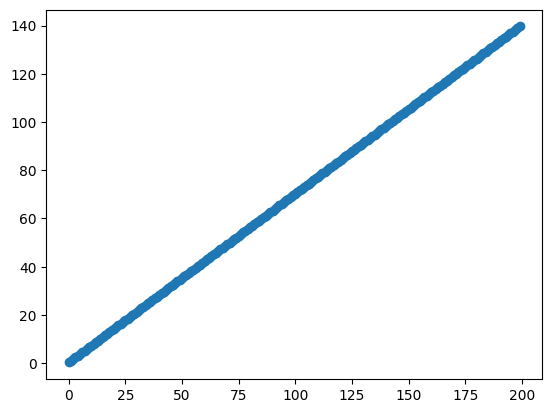

In [13]:
# Create Synthetic Data
W = 0.7
b = 0.3
num_of_sample = 200

X = torch.arange(num_of_sample).unsqueeze(dim=1)
Y = W * X + b

plt.figure()
plt.scatter(X, Y)
plt.show()

In [14]:
# Create training set and test set 80/20
split = int(len(X) * 0.8)
X_train, Y_train = X[:split].float(), Y[:split]
X_test, Y_test = X[split:].float(), Y[split:]


In [32]:
torch.manual_seed(42)
# Linear Regression Class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Make instance of class
model = LinearRegressionModel()

# Loss function
loss_fn = nn.L1Loss()

# Optimizer intialization
LR = 0.0001
optimizer = Adam(params=model.parameters(), lr=LR)

# Learning Algorithm
epochs = 10000

training_loss = []
test_loss = []

for epoch in range(epochs):
  # Train Model
  model.train()

  # Compute Y_hat
  Y_hat_train = model(X_train)

  # Compute Training Loss
  loss_train = loss_fn(Y_train, Y_hat_train)

  # Save into training loss arr
  training_loss.append(loss_train.item())

  # Stop acucmation of gradient
  optimizer.zero_grad()

  # Backprop
  loss_train.backward()

  # step
  optimizer.step()


  # Setup inference mode
  model.eval()
  with torch.inference_mode():
    Y_hat_train = model(X_test)

    # Check Training Loss
    loss_test = loss_fn(Y_hat_train, Y_test)

    # Save into training loss array
    test_loss.append(loss_test.item())

  # Print of if every 100 epoch the training and test loss
  if epoch % 1000 == 0:
    print(f"Epoch : {epoch} |  Training Loss : {loss_train} | Test Loss: {loss_test}")


Epoch : 0 |  Training Loss : 5.660821914672852 | Test Loss: 12.096620559692383
Epoch : 1000 |  Training Loss : 0.1858476847410202 | Test Loss: 0.26287728548049927
Epoch : 2000 |  Training Loss : 0.158871129155159 | Test Loss: 0.2246892899274826
Epoch : 3000 |  Training Loss : 0.1240682601928711 | Test Loss: 0.17556285858154297
Epoch : 4000 |  Training Loss : 0.08524365723133087 | Test Loss: 0.1205049529671669
Epoch : 5000 |  Training Loss : 0.04469116032123566 | Test Loss: 0.06314315646886826
Epoch : 6000 |  Training Loss : 0.003892700420692563 | Test Loss: 0.0061515807174146175
Epoch : 7000 |  Training Loss : 0.0007796551799401641 | Test Loss: 0.0006635665777139366
Epoch : 8000 |  Training Loss : 0.0007073924061842263 | Test Loss: 0.00044918060302734375
Epoch : 9000 |  Training Loss : 0.0006789751350879669 | Test Loss: 0.0004173278866801411


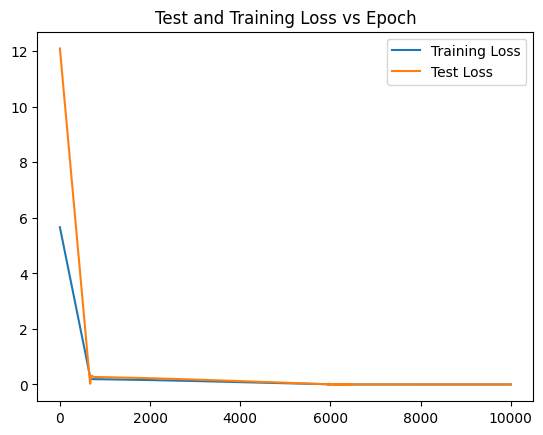

In [34]:
# Plot loss functions
plt.figure()
plt.plot(np.arange(epochs), training_loss, label='Training Loss')
plt.plot(np.arange(epochs), test_loss, label='Test Loss')
plt.title('Test and Training Loss vs Epoch')
plt.legend()
plt.show()

In [35]:
# Check Parameters
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7000]])),
             ('linear_layer.bias', tensor([0.3000]))])

In [36]:
# Save Model
from pathlib import Path

MAIN_DIRECTORY = Path("model")
MAIN_DIRECTORY.mkdir(parents=True, exist_ok=False)

MODEL_NAME = "01-logistic-regression-nn-linear.pth"
MODEL_SAVE_PATH = MAIN_DIRECTORY / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: model/01-logistic-regression-nn-linear.pth
